In [122]:
import json
import os
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.lines import Line2D

pd.set_option('display.max_columns', None)

In [123]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 25 17:32:00 2020

@author: davsu428
"""
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def createPitch(length,width, unity,linecolor): # in meters
    # Code by @JPJ_dejong

    """
    creates a plot in which the 'length' is the length of the pitch (goal to goal).
    And 'width' is the width of the pitch (sideline to sideline). 
    Fill in the unity in meters or in yards.

    """
    #Set unity
    if unity == "meters":
        # Set boundaries
        if length >= 120.5 or width >= 75.5:
            return(str("Field dimensions are too big for meters as unity, didn't you mean yards as unity?\
                       Otherwise the maximum length is 120 meters and the maximum width is 75 meters. Please try again"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)
           
            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)
            
            #Left Penalty Area
            plt.plot([16.5 ,16.5],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([0,16.5],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([16.5,0],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)
            
            #Right Penalty Area
            plt.plot([(length-16.5),length],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([(length-16.5), (length-16.5)],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([(length-16.5),length],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)
            
            #Left 5-meters Box
            plt.plot([0,5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([5.5,5.5],[(width/2+7.32/2+5.5),(width/2-7.32/2-5.5)],color=linecolor)
            plt.plot([5.5,0.5],[(width/2-7.32/2-5.5),(width/2-7.32/2-5.5)],color=linecolor)
            
            #Right 5 -eters Box
            plt.plot([length,length-5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([length-5.5,length-5.5],[(width/2+7.32/2+5.5),width/2-7.32/2-5.5],color=linecolor)
            plt.plot([length-5.5,length],[width/2-7.32/2-5.5,width/2-7.32/2-5.5],color=linecolor)
            
            #Prepare Circles
            centreCircle = plt.Circle((length/2,width/2),9.15,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((11,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-11,width/2),0.8,color=linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11,width/2),height=18.3,width=18.3,angle=0,theta1=308,theta2=52,color=linecolor)
            rightArc = Arc((length-11,width/2),height=18.3,width=18.3,angle=0,theta1=128,theta2=232,color=linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
            #Axis titles

    #check unity again
    elif unity == "yards":
        #check boundaries again
        if length <= 95:
            return(str("Didn't you mean meters as unity?"))
        elif length >= 131 or width >= 101:
            return(str("Field dimensions are too big. Maximum length is 130, maximum width is 100"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)
           
            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)
            
            #Left Penalty Area
            plt.plot([18 ,18],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([0,18],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([18,0],[(width/2 -18),(width/2 -18)],color=linecolor)
            
            #Right Penalty Area
            plt.plot([(length-18),length],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([(length-18), (length-18)],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([(length-18),length],[(width/2 -18),(width/2 -18)],color=linecolor)
            
            #Left 6-yard Box
            plt.plot([0,6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([6,6],[(width/2+7.32/2+6),(width/2-7.32/2-6)],color=linecolor)
            plt.plot([6,0],[(width/2-7.32/2-6),(width/2-7.32/2-6)],color=linecolor)
            
            #Right 6-yard Box
            plt.plot([length,length-6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([length-6,length-6],[(width/2+7.32/2+6),width/2-7.32/2-6],color=linecolor)
            plt.plot([length-6,length],[(width/2-7.32/2-6),width/2-7.32/2-6],color=linecolor)
            
            #Prepare Circles; 10 yards distance. penalty on 12 yards
            centreCircle = plt.Circle((length/2,width/2),10,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((12,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-12,width/2),0.8,color=linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11,width/2),height=20,width=20,angle=0,theta1=312,theta2=48,color=linecolor)
            rightArc = Arc((length-11,width/2),height=20,width=20,angle=0,theta1=130,theta2=230,color=linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
                
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax


def createPitchOld():
    #Taken from FC Python        
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color=linecolor)
    plt.plot([0,130],[90,90], color=linecolor)
    plt.plot([130,130],[90,0], color=linecolor)
    plt.plot([130,0],[0,0], color=linecolor)
    plt.plot([65,65],[0,90], color=linecolor)
    
    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color=linecolor)
    plt.plot([0,16.5],[65,65],color=linecolor)
    plt.plot([16.5,0],[25,25],color=linecolor)
    
    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color=linecolor)
    plt.plot([113.5,113.5],[65,25],color=linecolor)
    plt.plot([113.5,130],[25,25],color=linecolor)
    
    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color=linecolor)
    plt.plot([5.5,5.5],[54,36],color=linecolor)
    plt.plot([5.5,0.5],[36,36],color=linecolor)
    
    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color=linecolor)
    plt.plot([124.5,124.5],[54,36],color=linecolor)
    plt.plot([124.5,130],[36,36],color=linecolor)
    
    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color=linecolor,fill=False)
    centreSpot = plt.Circle((65,45),0.8,color=linecolor)
    leftPenSpot = plt.Circle((11,45),0.8,color=linecolor)
    rightPenSpot = plt.Circle((119,45),0.8,color=linecolor)
    
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color=linecolor)
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color=linecolor)

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax

def createGoalMouth():
    #Adopted from FC Python
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    linecolor='black'

    #Pitch Outline & Centre Line
    plt.plot([0,65],[0,0], color=linecolor)
    plt.plot([65,65],[50,0], color=linecolor)
    plt.plot([0,0],[50,0], color=linecolor)
    
    #Left Penalty Area
    plt.plot([12.5,52.5],[16.5,16.5],color=linecolor)
    plt.plot([52.5,52.5],[16.5,0],color=linecolor)
    plt.plot([12.5,12.5],[0,16.5],color=linecolor)
    
    #Left 6-yard Box
    plt.plot([41.5,41.5],[5.5,0],color=linecolor)
    plt.plot([23.5,41.5],[5.5,5.5],color=linecolor)
    plt.plot([23.5,23.5],[0,5.5],color=linecolor)
    
    #Goal
    plt.plot([41.5-5.34,41.5-5.34],[-2,0],color=linecolor)
    plt.plot([23.5+5.34,41.5-5.34],[-2,-2],color=linecolor)
    plt.plot([23.5+5.34,23.5+5.34],[0,-2],color=linecolor)
    
    #Prepare Circles
    leftPenSpot = plt.Circle((65/2,11),0.8,color=linecolor)
    
    #Draw Circles
    ax.add_patch(leftPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((32.5,11),height=18.3,width=18.3,angle=0,theta1=38,theta2=142,color=linecolor)
    
    #Draw Arcs
    ax.add_patch(leftArc)
    
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax


In [124]:
# path = """D:\\studia\\magister\\semestr2\\analiza_danych_sportowych\\events.json"""
path = 'events.json'

Xg_req = pd.DataFrame(data=None)
with open("%s" % path,encoding="utf8") as data_file:    
    data = json.load(data_file)
    df = pd.DataFrame(data=None) 
    df = pd.json_normalize(data, sep = "_")
    
Xg_req = Xg_req.append(df,ignore_index=True,sort=False)
df = Xg_req
df.head()

C:\Users\micha\AppData\Local\Temp\ipykernel_8632\2105138587.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Xg_req = Xg_req.append(df,ignore_index=True,sort=False)


,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,foul_won_defensive,off_camera,ball_receipt_outcome_id,ball_receipt_outcome_name,counterpress,dribble_outcome_id,dribble_outcome_name,dribble_overrun,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,pass_switch,pass_backheel,block_deflection,foul_committed_advantage,foul_won_advantage,pass_aerial_won,pass_technique_id,pass_technique_name,pass_through_ball,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,ball_recovery_offensive,pass_cross,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_committed_card_id,foul_committed_card_name,bad_behaviour_card_id,bad_behaviour_card_name,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,foul_committed_type_id,foul_committed_type_name,foul_committed_offensive,shot_first_time,shot_redirect,block_offensive,interception_outcome_id,interception_outcome_name,pass_goal_assist,shot_aerial_won,ball_recovery_recovery_failure,pass_miscommunication,shot_deflected,clearance_aerial_won,pass_deflected,foul_committed_penalty,foul_won_penalty
0,e9590f44-31cd-4bfb-a5b5-d1b77edabe0e,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,220,Real Madrid,1,Regular Play,220,Real Madrid,433.0,"[{'player': {'id': 11179, 'name': 'Iker Casill...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8e6accf0-c0e9-4e50-8057-7afc7934a4cf,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,220,Real Madrid,1,Regular Play,212,Atlético Madrid,442.0,"[{'player': {'id': 3509, 'name': 'Thibaut Cour...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,eadd5c91-88e9-45b6-bcde-8bdc774a144f,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,220,Real Madrid,1,Regular Play,220,Real Madrid,NaN,NaN,[990af1f5-ba52-478c-b8ec-c7d65754faaf],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,990af1f5-ba52-478c-b8ec-c7d65754faaf,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,220,Real Madrid,1,Regular Play,212,Atlético Madrid,NaN,NaN,[eadd5c91-88e9-45b6-bcde-8bdc774a144f],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [125]:
shots = df[df.type_name == 'Shot'].set_index('id')
shots.head()

,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,foul_won_defensive,off_camera,ball_receipt_outcome_id,ball_receipt_outcome_name,counterpress,dribble_outcome_id,dribble_outcome_name,dribble_overrun,duel_type_id,duel_type_name,duel_outcome_id,duel_outcome_name,pass_switch,pass_backheel,block_deflection,foul_committed_advantage,foul_won_advantage,pass_aerial_won,pass_technique_id,pass_technique_name,pass_through_ball,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,ball_recovery_offensive,pass_cross,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_technique_id,shot_technique_name,shot_body_part_id,shot_body_part_name,shot_type_id,shot_type_name,shot_outcome_id,shot_outcome_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_outcome_id,goalkeeper_outcome_name,foul_committed_card_id,foul_committed_card_name,bad_behaviour_card_id,bad_behaviour_card_name,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_body_part_id,goalkeeper_body_part_name,foul_committed_type_id,foul_committed_type_name,foul_committed_offensive,shot_first_time,shot_redirect,block_offensive,interception_outcome_id,interception_outcome_name,pass_goal_assist,shot_aerial_won,ball_recovery_recovery_failure,pass_miscommunication,shot_deflected,clearance_aerial_won,pass_deflected,foul_committed_penalty,foul_won_penalty
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
64999eef-a759-4227-ab59-85f3134f06c6,603,1,00:12:41.654,12,41,32,1.307250,16,Shot,212,Atlético Madrid,7,From Goal Kick,212,Atlético Madrid,NaN,NaN,"[689cc375-f697-458d-8658-892a49f58ee5, a9cd825...","[85.0, 60.0]",6391.0,Raúl García Escudero,12.0,Right Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014857,"[119.0, 37.2, 5.1]",728323d8-7da8-47f3-bd73-f2921d9f5147,93.0,Normal,40.0,Right Foot,87.0,Open Play,98.0,Off T,"[{'location': [115.0, 41.0], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6752a685-ea76-4b9c-b304-8ce69167d9f3,1066,1,00:27:19.675,27,19,61,0.957200,16,Shot,220,Real Madrid,3,From Free Kick,220,Real Madrid,NaN,NaN,[b81d3a0e-b410-413e-85d0-2df9f3004f71],"[94.0, 22.0]",5207.0,Cristiano Ronaldo dos Santos Aveiro,21.0,Left Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028697,"[120.0, 39.5, 1.1]",NaN,93.0,Normal,40.0,Right Foot,62.0,Free Kick,100.0,Saved,"[{'location': [101.0, 23.0], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b1561913-553b-4681-a8ab-4bd960b191f5,1200,1,00:31:03.861,31,3,72,0.316691,16,Shot,212,Atlético Madrid,4,From Throw In,212,Atlético Madrid,NaN,NaN,[0ce1ecc2-1fcc-4f95-ad53-071cc589bea7],"[97.0, 50.0]",6735.0,Adrián López Álvarez,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034769,"[107.0, 40.0]",NaN,91.0,Half Vol

In [126]:
pitch_width = 120
pitch_height = 80
home_team = 'Real Madrid'
away_team = 'Atlético Madrid'

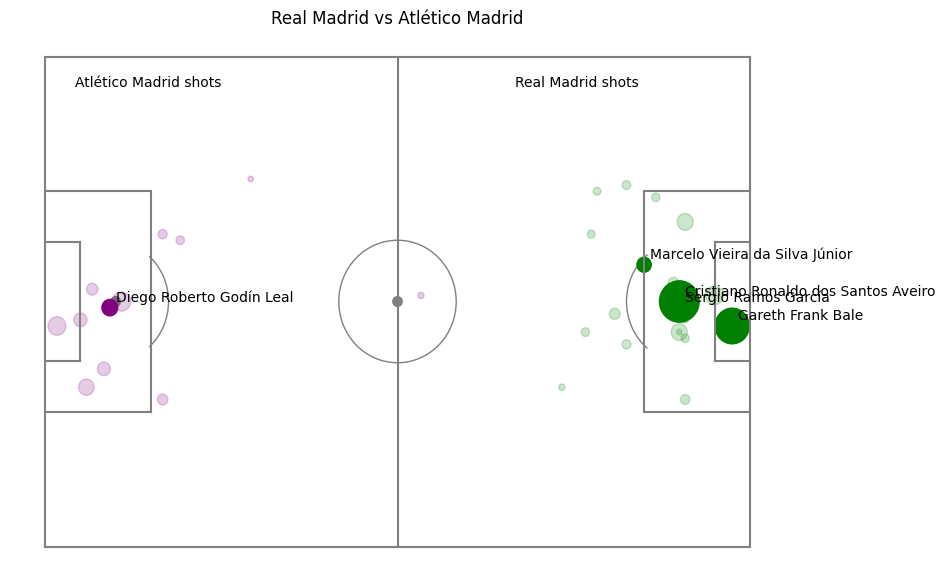

In [127]:
fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')

for i, shot in shots.iterrows():
    x = shot['location'][0]
    y = shot['location'][1]
    
    goal = shot['shot_outcome_name']=='Goal'
    team_name = shot['team_name']
    
    circle_size = 2
    circle_size = np.sqrt(shot['shot_statsbomb_xg'] * 15)
    
    if team_name == home_team:
        if goal:
            shot_circle = plt.Circle((x, pitch_height-y), circle_size, color='green')
            plt.text((x+1), pitch_height-y+1, shot['player_name'])
        else:
            shot_circle = plt.Circle((x, pitch_height-y), circle_size, color='green')
            shot_circle.set_alpha(.2)
    elif team_name == away_team:
        if goal:
            shot_circle = plt.Circle((pitch_width-x, y), circle_size, color='purple')
            plt.text((pitch_width-x+1), y+1, shot['player_name'])
        else:
            shot_circle = plt.Circle((pitch_width-x, y), circle_size, color='purple')
            shot_circle.set_alpha(.2)
    
    ax.add_patch(shot_circle)
    
plt.text(5, 75, away_team + ' shots')
plt.text(80, 75, home_team + ' shots')

plt.title('Real Madrid vs Atlético Madrid')

fig.set_size_inches(10, 7)
# fig.savefig('real_athletico_shots.png', dpi=300) 

plt.show()

In [128]:
fouls = df[(df.type_name == 'Foul Committed')]
fouls = fouls[["period", "timestamp", "location", "team_name", "foul_committed_card_name"]]
fouls.head()

,period,timestamp,location,team_name,foul_committed_card_name
21,1,00:00:12.890,"[54.0, 3.0]",Atlético Madrid,NaN
140,1,00:02:07.674,"[73.0, 69.0]",Real Madrid,NaN
162,1,00:02:47.261,"[57.0, 44.0]",Atlético Madrid,NaN
240,1,00:03:49.348,"[89.0, 25.0]",Real Madrid,NaN
352,1,00:06:23.681,"[51.0, 64.0]",Real Madrid,NaN


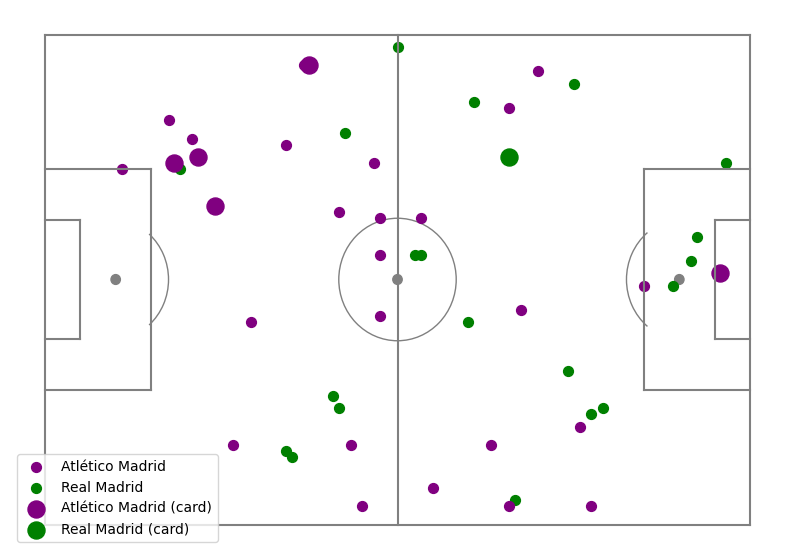

In [129]:
fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')
for f in zip(fouls['location'], fouls['team_name'], fouls['foul_committed_card_name']):
    loc = f[0]
    c = 'purple'
    s = 50
    m = 'o'
    l = f[1]
    if f[1] == 'Real Madrid': 
        c = 'green'
    if f[2] in ['Yellow Card', 'Second Yellow Card', 'Red Card']:
        s = 150
        l += ' (card)'
    scatter = plt.scatter(loc[0], loc[1], s=s, color=c, label=l)

fig.set_size_inches(10, 7)

handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
ax.legend(*zip(*unique), loc="lower left")   
plt.show()

In [130]:
DiMaria_receipt  = df[(df.team_name == 'Real Madrid') & (df.pass_recipient_name == 'Ángel Fabián Di María Hernández')]
DiMaria_receipt = DiMaria_receipt[["id", "period", "timestamp", "location", "pass_end_location", "pass_height_name"]]

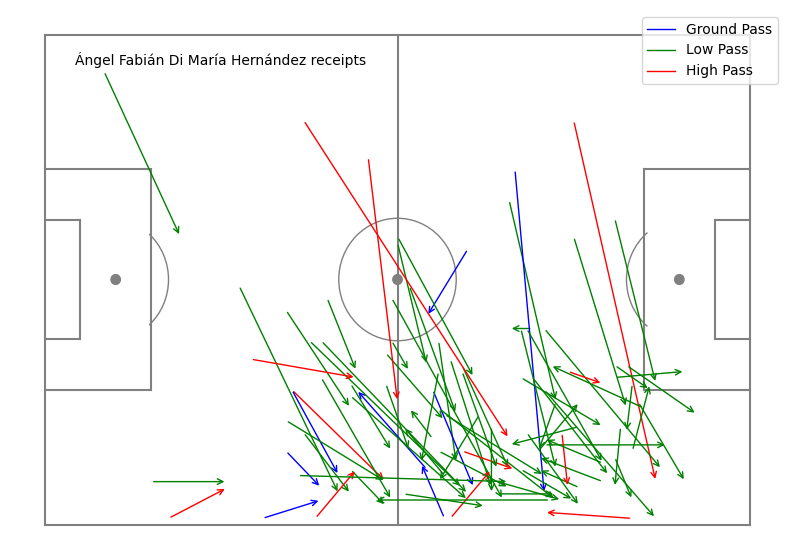

In [131]:
legend_custom_lines = [Line2D([0], [0], color='blue', lw=1),
                Line2D([0], [0], color='green', lw=1),
                Line2D([0], [0], color='red', lw=1)]

fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')

for i in range(len(DiMaria_receipt)):
    color = 'green'
    lw = 1
    if DiMaria_receipt.iloc[i]['pass_height_name'] == 'Low Pass': 
        color = 'blue'
    if DiMaria_receipt.iloc[i]['pass_height_name'] == 'High Pass': 
        color = 'red'

        
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (DiMaria_receipt.iloc[i]['pass_end_location'][0], DiMaria_receipt.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (DiMaria_receipt.iloc[i]['location'][0], DiMaria_receipt.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color, linewidth=lw))

fig.set_size_inches(10, 7)
plt.text(5, 75, 'Ángel Fabián Di María Hernández receipts')
plt.legend(legend_custom_lines, ['Ground Pass', 'Low Pass', 'High Pass'], loc='upper right')
plt.show()

In [132]:
DiMaria_pass  = df[(df.type_name == 'Pass') & (df.team_name == 'Real Madrid') & (df.player_name == 'Ángel Fabián Di María Hernández')]
DiMaria_pass = DiMaria_pass[["id", "period", "timestamp", "location", "pass_end_location", "pass_shot_assist"]]
DiMaria_pass.head()

,id,period,timestamp,location,pass_end_location,pass_shot_assist
14,29cae4ab-2023-4e77-a107-28c7b898d8cc,1,00:00:06.510,"[54.0, 24.0]","[41.0, 53.0]",NaN
31,6292388e-2e1f-4de5-a74d-e948f0ebff94,1,00:00:27.876,"[53.0, 20.0]","[58.0, 15.0]",NaN
121,02f68ba9-780b-45bf-b5d0-56e56444f60f,1,00:01:50.727,"[72.0, 5.0]","[81.0, 18.0]",NaN
172,0721a724-50b9-4fdb-80e7-babd2cbf674d,1,00:03:06.406,"[61.0, 22.0]","[57.0, 32.0]",NaN
196,bd0e48dc-f1a9-490d-a8a7-c9513630da5c,1,00:03:29.880,"[72.0, 25.0]","[85.0, 35.0]",NaN


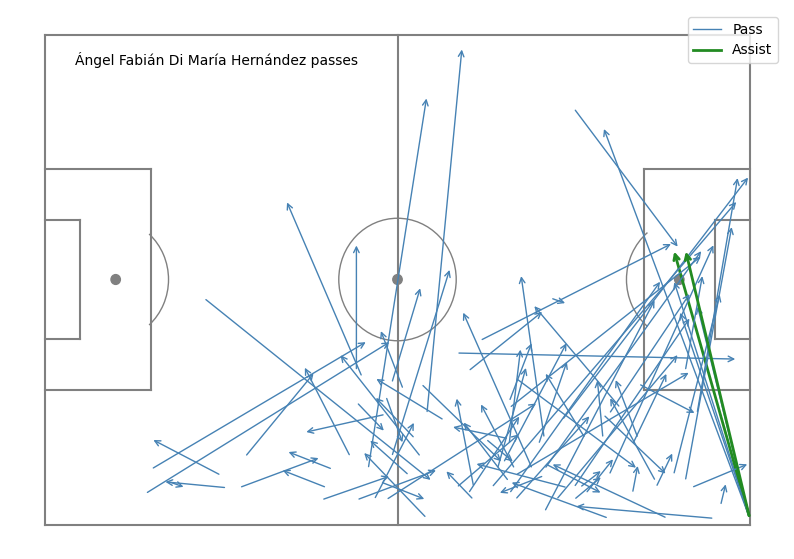

In [133]:
fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')

legend_custom_lines = [Line2D([0], [0], color='steelblue', lw=1),
                Line2D([0], [0], color='forestgreen', lw=2)]

for i in range(len(DiMaria_pass)):
    color = 'steelblue'
    lw = 1
    if DiMaria_pass.iloc[i]['pass_shot_assist'] == True: 
        color = 'forestgreen'
        lw = 2
        
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = (DiMaria_pass.iloc[i]['pass_end_location'][0], DiMaria_pass.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (DiMaria_pass.iloc[i]['location'][0], DiMaria_pass.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color, linewidth=lw))

fig.set_size_inches(10, 7)
plt.text(5, 75, 'Ángel Fabián Di María Hernández passes')

plt.legend(legend_custom_lines, ['Pass', 'Assist'], loc='upper right')

plt.show()

In [134]:
legend_custom_lines = [Line2D([0], [0], color='green', lw=1),
                       Line2D([0], [0], color='purple', lw=1)]

In [135]:
real_passes  = df[(df.type_name == 'Pass') & (df.team_name == 'Real Madrid')]
real_passes = real_passes[["id", "minute"]]
athl_passes  = df[(df.type_name == 'Pass') & (df.team_name == 'Atlético Madrid')]
athl_passes = athl_passes[["id", "minute"]]

In [136]:
mins = [x*10 for x in range(0, 13)]
v1 = [len(real_passes[real_passes['minute'] < m]) for m in mins]
v2 = [len(athl_passes[athl_passes['minute'] < m]) for m in mins]

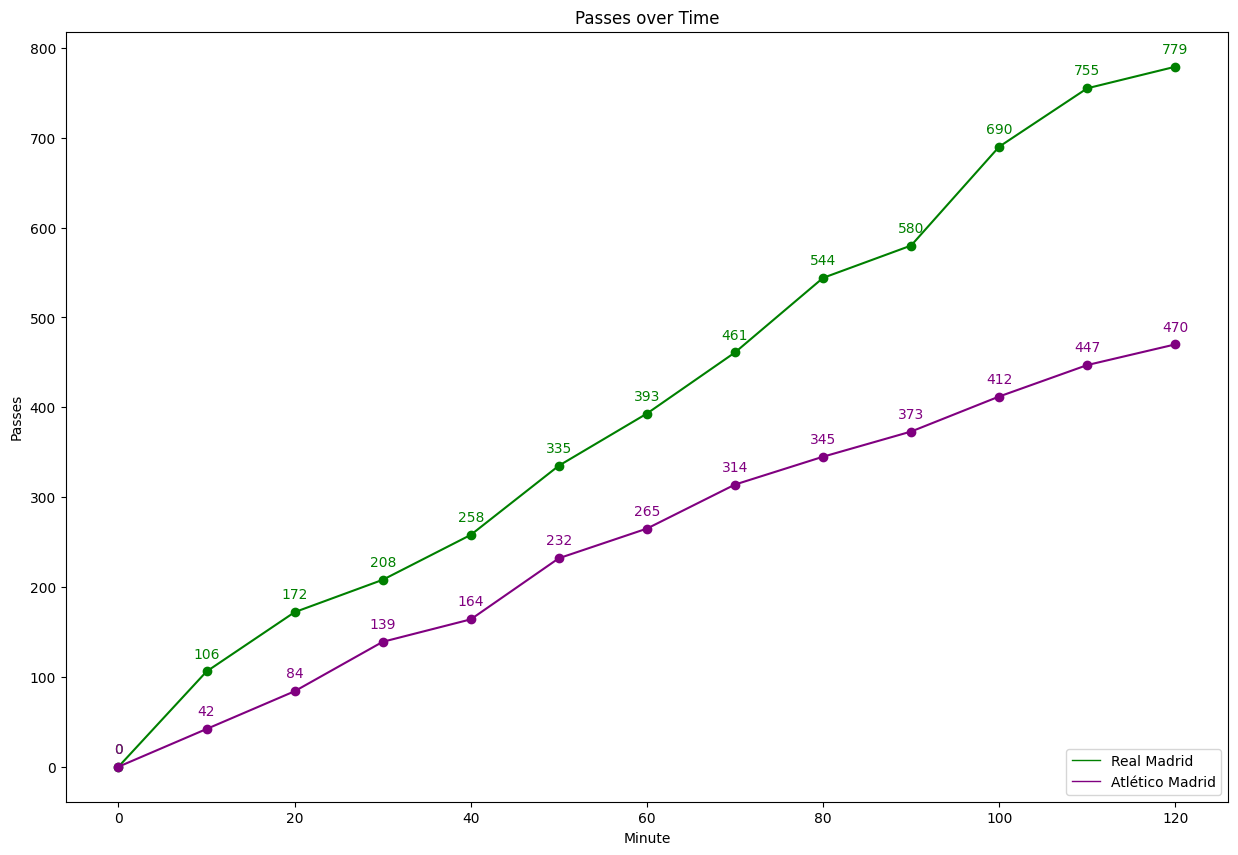

In [137]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
plt.xlabel("Minute")
plt.ylabel("Passes")
plt.plot(mins, v1, '-o', color = 'green')
for i, v in enumerate(v1):
    ax.text(i*10, v+15, "%d" %v, ha="center", color='green')
    
# plt.plot(mins, [item[1] for item in passes_total], '-o', color = 'purple')
plt.plot(mins, v2, '-o', color = 'purple')
for i, v in enumerate(v2):
    ax.text(i*10, v+15, "%d" %v, ha="center", color='purple')

plt.title('Passes over Time')
plt.legend(legend_custom_lines, ['Real Madrid', 'Atlético Madrid'], loc='lower right')
plt.show()

In [138]:
real_shots  = df[(df.type_name == 'Shot') & (df.team_name == 'Real Madrid')]
real_shots = real_shots[["id", "minute", "shot_outcome_name"]]
athl_shots  = df[(df.type_name == 'Shot') & (df.team_name == 'Atlético Madrid')]
athl_shots = athl_shots[["id", "minute", "shot_outcome_name"]]

In [139]:
real_goals = real_shots[real_shots['shot_outcome_name'] == 'Goal']
athl_goals = athl_shots[athl_shots['shot_outcome_name'] == 'Goal']

In [140]:
mins = [x*10 for x in range(0, 13)]
v1 = [len(real_shots[real_shots['minute'] < m]) for m in mins]
v2 = [len(athl_shots[athl_shots['minute'] < m]) for m in mins]

In [141]:
legend_custom_lines = [Line2D([0], [0], color='green', lw=1),
                       Line2D([0], [0], color='purple', lw=1)]

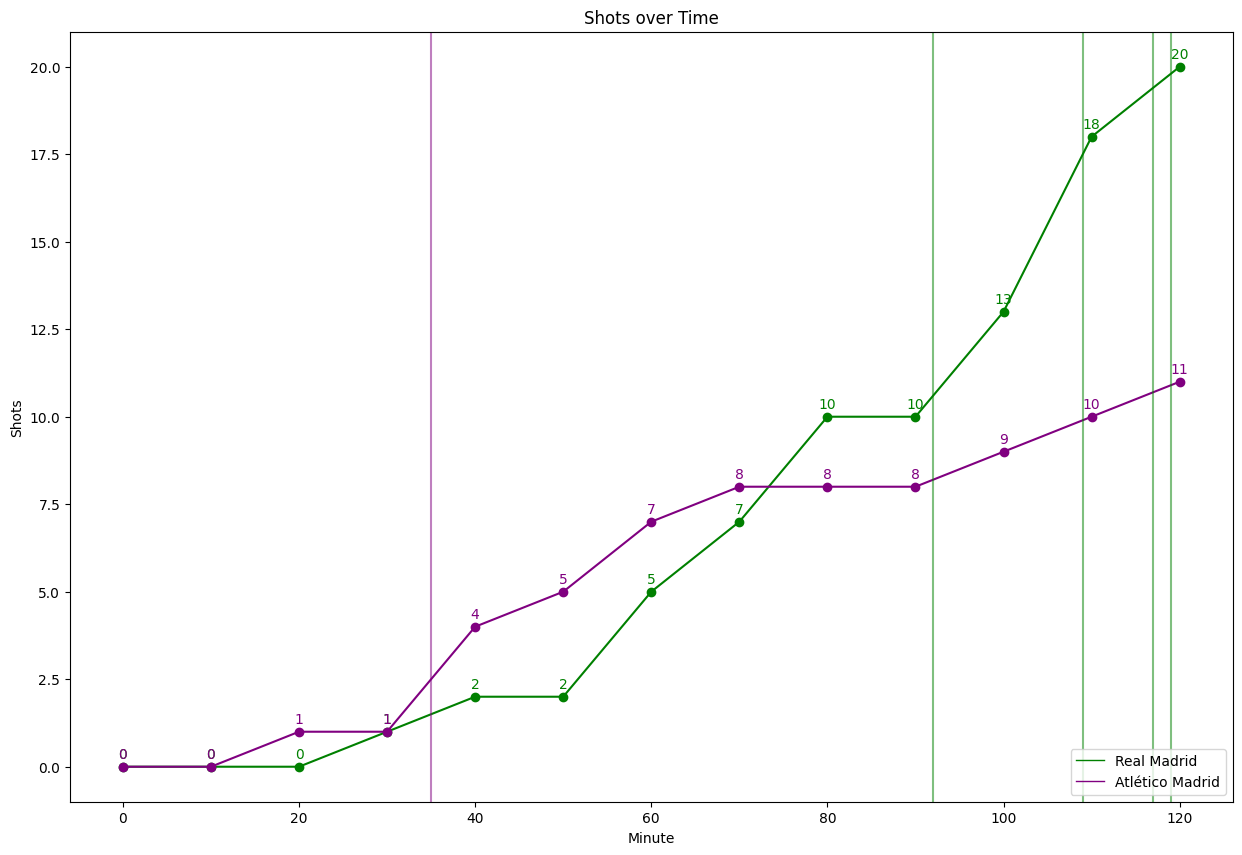

In [143]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
plt.xlabel("Minute")
plt.ylabel("Shots")
plt.plot(mins, v1, '-o', color = 'green')
for i, v in enumerate(v1):
    ax.text(i*10, v+0.25, "%d" %v, ha="center", color='green')
    
# plt.plot(mins, [item[1] for item in passes_total], '-o', color = 'purple')
plt.plot(mins, v2, '-o', color = 'purple')
for i, v in enumerate(v2):
    ax.text(i*10, v+0.25, "%d" %v, ha="center", color='purple')

# Plot Goals
for goal in real_goals.values:
    plt.axvline(x = goal[1], color = 'green', alpha=0.5)
for goal in athl_goals.values:
    plt.axvline(x = goal[1], color = 'purple', alpha=0.5)

# plt.axvline(x = 90, color = 'grey', alpha=0.5)

plt.title('Shots over Time')
plt.legend(legend_custom_lines, ['Real Madrid', 'Atlético Madrid'], loc='lower right')
plt.show()